<a href="https://colab.research.google.com/github/SachinKhyadi/ML-Project/blob/master/Teq_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Internship Project on Artificial Intelligence and Machine Learning**

**What is Artificial Intelligence?**

The ability for machines and computer systems to perform tasks normally requiring human intelligence such as translating between languages,visual perception and decision-making.

The ability for AI to solve problems in an uncertain environment is continuously improving as it learns from the experiances and data it collects and processess.

**What is Machine Learning?**

Machine Learning is defined as the use and development of computer systems with the ability to learn and adapt without following explicit instructions,by using algorithms and statistical models to analyze and draw inferences from patterns in data and make accurate predictions. 

** "Exploratory Data Analysis of Car Features"**

This is the project of car dataset,which is used to perform certain operations like altering,removing,updating,..etc of certain columns and rows.So in this notebook we will explore the data and make it ready for modeling.

**Introduction**

**What is Exploratory Data Analysis?**

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we understand the problem better and try to uncover hidden insights.

**How to perform Exploratory Data Analysis?**

Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this notebook you can understand some common methods and plots that would be used in the EDA process.

**What data are we exploring today?**

The data-set can be downloaded from here. To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. So in this notebook, we will explore the data and make it ready for modeling.

**1.Importing the required libraries for EDA**

In [2]:
# Importing required EDA libraries 
import pandas as pd
import numpy as np
import seaborn as sns                             #visualisation
import matplotlib.pyplot as plt                   #visualisation
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(color_codes=True)

**1.1 Loading the data into Data frame**

In [9]:
Data=pd.read_csv("data.csv")
#To display top 5 rows
Data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [10]:
#To display bottom 5 rows
Data.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


**1.1 Checking the types of data and basic summary stats**

Here we have to check which data types are being used because sometimes the MSRP or the price of the car could be stored in string,if in that case we have to change the string to integer data type only then we can plot the data in the graph.Here as we have the given data is in integer format so no need to worry.

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [12]:
# Checking the data type
Data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [13]:
#Statistical summary
Data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [14]:
#Shape - number of elements in each dimension
Data.shape

(11914, 16)

In [15]:
#NULL values
d=Data.isnull().sum()
d

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

**2.Dropping irrelevant columns**

This step is certainly needed in EDA because sometimes there would be some columns that we never use and in such case dropping is usefull.Here in the above given car dataset I remove the columns such as 'Market Category','Number of Doors','Engine Fuel Type',which are not much relevant

In [16]:
#drop the uneccessary Columns
Data=Data.drop(['Market Category','Number of Doors','Engine Fuel Type'],axis=1)

In [17]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Driven_Wheels      11914 non-null  object 
 7   Vehicle Size       11914 non-null  object 
 8   Vehicle Style      11914 non-null  object 
 9   highway MPG        11914 non-null  int64  
 10  city mpg           11914 non-null  int64  
 11  Popularity         11914 non-null  int64  
 12  MSRP               11914 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


**2.1Renaming the columns**

In this step I Rename the columns of the given Car Dataset as per the problem statement assigned. Renaming the columns as-"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"

In [18]:
#Renaming the Columns
Data.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price'},inplace=True)

**2.2 Count the number of rows and columns**

In this step,after Renaming and Dropping the Columns it is necessary to count the number of rows and columns to get the systematic view of Dataset.

In [19]:
#Total number of rows and columns
Data.shape

(11914, 13)

**2.3 Checking for Duplicate data**

In this step we have to check the rows containing any duplicate data.

In [20]:
#rows containing duplicate data
duplicate_rows=Data[Data.duplicated()]
print(duplicate_rows)

         Make     Model  Year     HP  ...  MPG-H MPG-C Popularity  Price
14        BMW  1 Series  2013  230.0  ...     28    19       3916  31500
18       Audi       100  1992  172.0  ...     24    17       3105   2000
20       Audi       100  1992  172.0  ...     24    17       3105   2000
24       Audi       100  1993  172.0  ...     24    17       3105   2000
25       Audi       100  1993  172.0  ...     24    17       3105   2000
...       ...       ...   ...    ...  ...    ...   ...        ...    ...
11481  Suzuki      X-90  1998   95.0  ...     26    22        481   2000
11603   Volvo      XC60  2017  302.0  ...     29    20        870  46350
11604   Volvo      XC60  2017  240.0  ...     30    23        870  40950
11708  Suzuki       XL7  2008  252.0  ...     22    15        481  29149
11717  Suzuki       XL7  2008  252.0  ...     22    16        481  27499

[792 rows x 13 columns]


**2.4 Count the number of rows**

After checking for any duplicate data then we have to count the number of rows used.

In [21]:
#Count the number of rows used
Data.count()

Make             11914
Model            11914
Year             11914
HP               11845
Cylinders        11884
Transmission     11914
Drive Mode       11914
Vehicle Size     11914
Vehicle Style    11914
MPG-H            11914
MPG-C            11914
Popularity       11914
Price            11914
dtype: int64

**2.5 Dropping the Duplicates**

In this step we have to drop the duplicate data if any exists to get rid of memory wastage.

In [22]:
#Drop the duplicates
Data=Data.drop_duplicates()
Data.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


**2.6 Count the number of rows after removing duplicates**

In this step we have to count the number of rows after removing duplicate data.

In [23]:
#Count the number of rows after removing duplicates.
Data.count()

Make             11122
Model            11122
Year             11122
HP               11053
Cylinders        11092
Transmission     11122
Drive Mode       11122
Vehicle Size     11122
Vehicle Style    11122
MPG-H            11122
MPG-C            11122
Popularity       11122
Price            11122
dtype: int64

**3.Finding the Null Values**

In this step we have to find the null values of the given Car dataset.

In [24]:
#Finding the null values.
print(Data.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


**3.1 Drop the missing values.**

After finding the null values we have to drop the missing values if any exhists.

In [25]:
#Drop the missing values.
Data=Data.dropna()
Data.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

**3.2 Display the data after dropping values.**

In [26]:
#After dropping the values
print(Data.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


**4.Plotting the Graphs.**

In this step we have to Plot graphs of various columns to check for outliers and remove those data points from the data.An outlier is a point or set of points different from other points.It will be good practice to detect and remove outliers because sometimes they can be very high or very low.Also they will resulting in less accurate model.

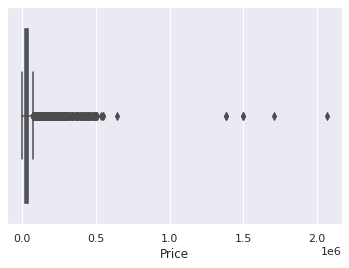

In [27]:
#Plot the graphs of Data(Columns)
sns.boxplot(x=Data['Price'])

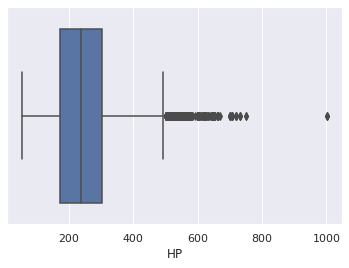

In [28]:
sns.boxplot(x=Data['HP'])

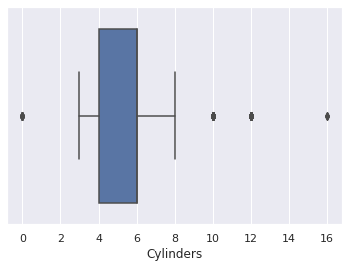

In [29]:
sns.boxplot(x=Data['Cylinders'])

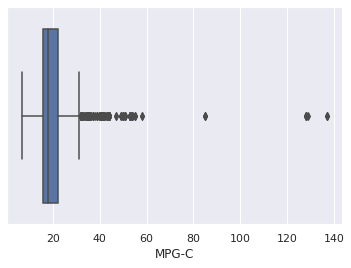

In [30]:
sns.boxplot(x=Data['MPG-C'])

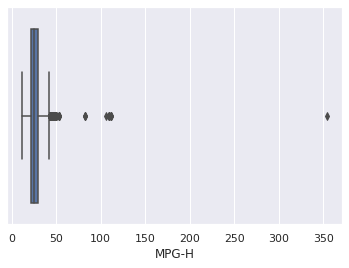

In [31]:
sns.boxplot(x=Data['MPG-H'])

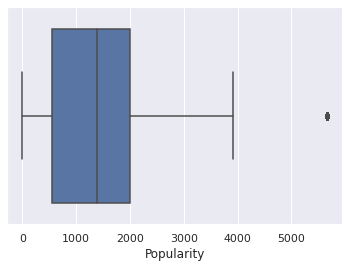

In [32]:
sns.boxplot(x=Data['Popularity'])

In [33]:
#Find IQR
Q1=Data.quantile(0.25)
Q3=Data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


**4.1 Removing the Outliners.**

After detecting the outliners, we have to remove them for getting accurate model.

In [34]:
#Remove the Outliners
Data=Data[~((Data<(Q1-1.5*IQR)) | (Data>(Q3+1.5*IQR))).any(axis=1)]

**4.2 Representation of Top Car brands and finding the average price of the cars.**

In this step,we have to check which top car brands are the most represented in the dataset and find the average price among the top car brands.

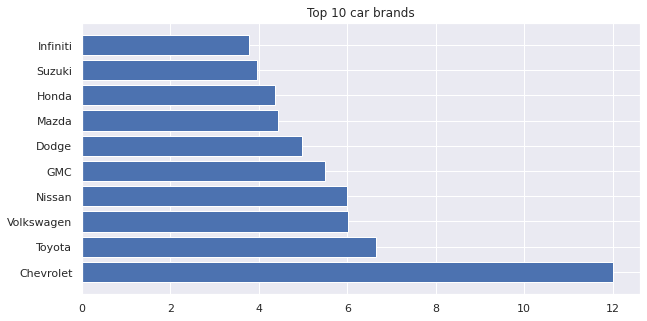

In [35]:
#Percentage of car per brand
counts=Data['Make'].value_counts()*100/sum(Data['Make'].value_counts())

#Top 10 car brands
popular_labels=counts.index[:10]

#Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels,width=counts[:10])
plt.title('Top 10 car brands')
plt.show()

In [36]:
Prices=Data[['Make','Price']].loc[(Data['Make']=='Chevrolet')|
              (Data['Make']=='Ford')|
              (Data['Make']=='Volkswagen')|
              (Data['Make']=='Toyota')|
              (Data['Make']=='Dodge')|
              (Data['Make']=='Nissan')|
              (Data['Make']=='GMC')|
              (Data['Make']=='Honda')|
              (Data['Make']=='Mazda')].groupby('Make').mean()
print(Prices) 

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


**4.3 Plotting the Correlation Matrix.**

In this step, we have to use Heat Maps which is used to plot the necessary variables.One of the best ways to represent the correlation matrix between features.

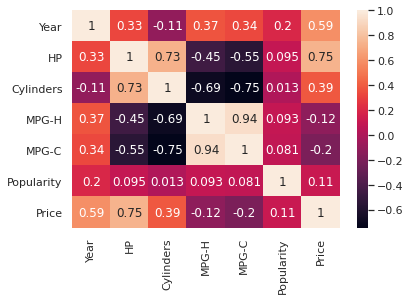

In [37]:
#Plotting Correlation Matrix
corrMatrix=Data.corr()
sns.heatmap(corrMatrix,annot=True)

**The above Correlation Matrix concludes:**

1 . The MPG-H and MPG-C are negatively dependent on Cylinders, that means as the cylinders in a car increases the mileage on highway and city highly decrease i,e Cylinders and MPG-H, MPG-C are inversely proportional to each other.

2 . The Price and HP(Horse power) are positively dependent on each other which means that the price and HP are directly proportional to each other i,e as the Horse power of a car increases the price for that car also increases.

3 . The HP(Horse Power) and the cylinders are positively dpendent i,e as the Cylinders for a car increases the Horse power for that car also increases.

4 . The Year and Price are positively dependent which means price for a car increases as the changes(or increases), because after a year are upgradation for some certain cars which reaults in the increases in price

**4.4 Plotting different graphs with respect to price of the cars and other attributes of the cars.**


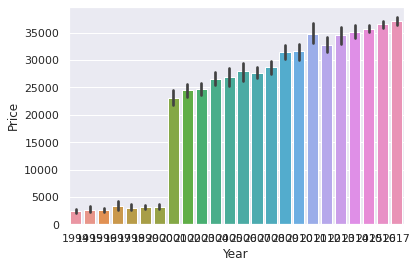

In [38]:
#Plotting bar graph for 'Price' with respect to 'Year'
sns.barplot(x=Data['Year'],y=Data['Price'])

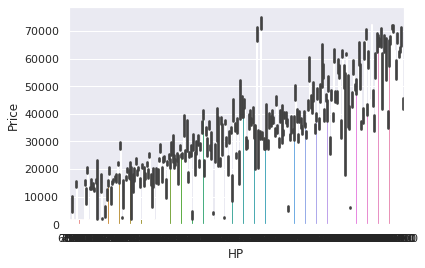

In [39]:
#Plotting bar graph for 'Price' with respect to 'HP'
sns.barplot(x=Data['HP'],y=Data['Price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


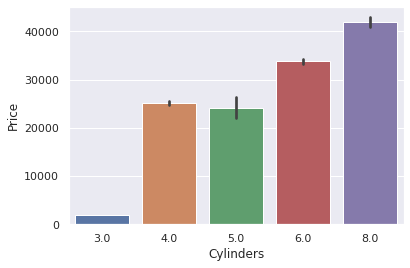

In [42]:
#Plotting bar graph for 'Price' with respect to 'Cylinders'
sns.barplot(Data['Cylinders'],Data['Price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


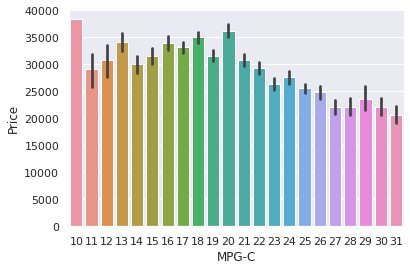

In [43]:
sns.barplot(Data['MPG-C'],Data['Price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


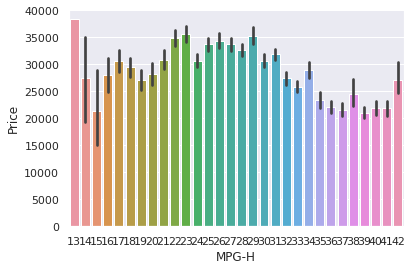

In [44]:
sns.barplot(Data['MPG-H'],Data['Price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


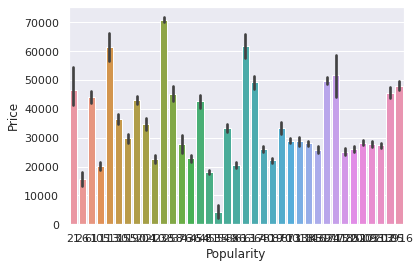

In [45]:
sns.barplot(Data['Popularity'],Data['Price'])

In [46]:
dcc=Data.select_dtypes(exclude=[np.number]).columns
dcc

Index(['Make', 'Model', 'Transmission', 'Drive Mode', 'Vehicle Size',
       'Vehicle Style'],
      dtype='object')

In [47]:
#Importing the Label Encoder to Encode the Categorical data
from sklearn.preprocessing import LabelEncoder
#Creating the object instance
label_enc=LabelEncoder()
for i in dcc:
  Data[i]=label_enc.fit_transform(Data[i])
print('Label Encoded Data')
Data.head()

Label Encoded Data


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,1,2011,335.0,6.0,2,3,0,8,26,19,3916,46135
1,3,0,2011,300.0,6.0,2,3,0,6,28,19,3916,40650
2,3,0,2011,300.0,6.0,2,3,0,8,28,20,3916,36350
3,3,0,2011,230.0,6.0,2,3,0,8,28,18,3916,29450
4,3,0,2011,230.0,6.0,2,3,0,6,28,18,3916,34500


In [48]:

a = Data[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
b = Data['Price'].values

In [49]:

# Scaling
from sklearn.preprocessing import StandardScaler
sc_a = StandardScaler()
sc_b = StandardScaler()
a = sc_a.fit_transform(a)
b = sc_b.fit_transform(b.reshape(-1,1))

In [50]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(a,b,test_size=0.2,random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6836, 6) (6836, 1)
(1710, 6) (1710, 1)


In [51]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

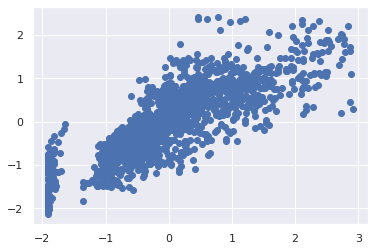

In [52]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


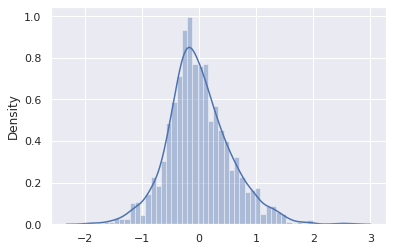

In [53]:
sns.distplot((y_test-y_pred),bins=50)

In [54]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4256788993790108
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161142


**5.Using different algorithms checking performance over the metrics like R square,MAE,RMSE.**

In [55]:
#Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

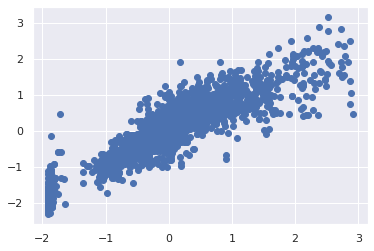

In [56]:
# Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


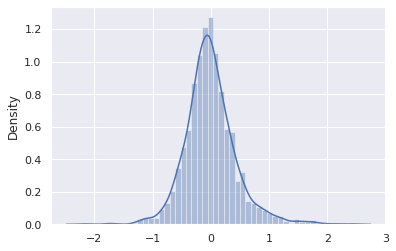

In [57]:
sns.distplot((y_test-y_pred),bins=50)

In [58]:
print("SCORES :")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R SQUARE:', metrics.r2_score(y_test, y_pred))

SCORES :
MAE: 0.31573061752350967
RMSE: 0.4351456478672659
R SQUARE: 0.8053160242314694


In [59]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

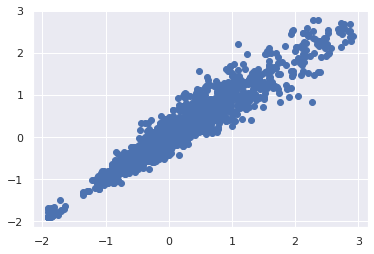

In [60]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


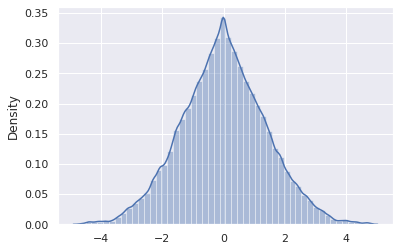

In [61]:
sns.distplot((y_test-y_pred),bins=50)

In [63]:
print("SCORES :")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R SQUARE:', metrics.r2_score(y_test, y_pred))

SCORES :
MAE: 0.17769704010247667
RMSE: 0.24743996001244517
R SQUARE: 0.9370492959370332


In [64]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

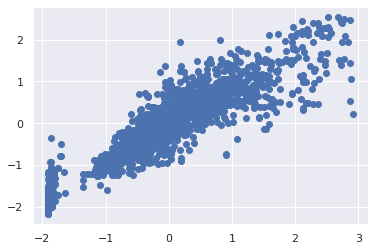

In [65]:
#Predicting a new result
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


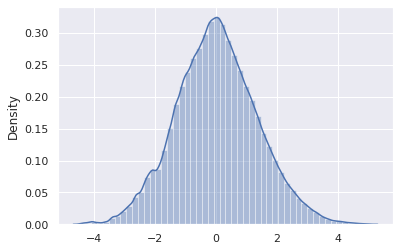

In [66]:
sns.distplot((y_test-y_pred),bins=50)

In [67]:
print("SCORES :")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R SQUARE:', metrics.r2_score(y_test, y_pred))

SCORES :
MAE: 0.29633619416546725
RMSE: 0.42527355451237575
R SQUARE: 0.814049362176249


In this project Random Forest Regression algorithm best fits the dataset accurately than other algorithms.